# painless q learninn
http://mnemstudio.org/path-finding-q-learning-tutorial.htm
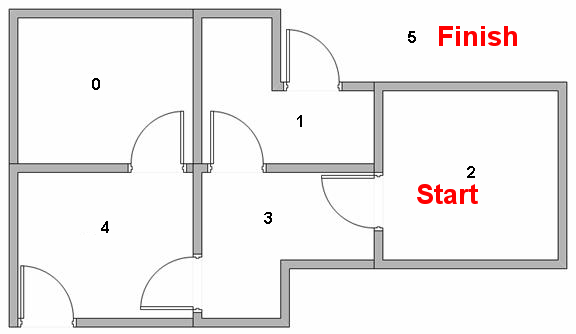


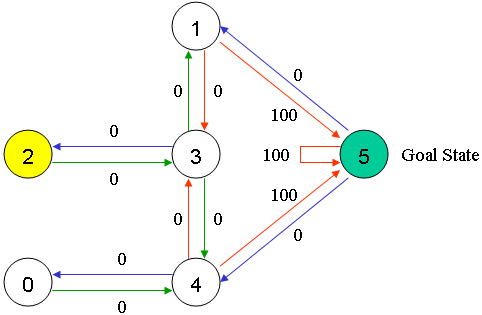

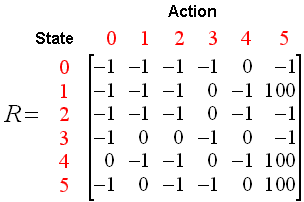

The Q-Learning algorithm goes as follows:

1. Set the gamma parameter, and environment rewards in matrix R.

2. Initialize matrix Q to zero.

3. For each episode:

    Select a random initial state.

    Do While the goal state hasn't been reached.

    + Select one among all possible actions for the current state.
    + Using this possible action, consider going to the next state.
    + Get maximum Q value for this next state based on all possible actions.
    + Compute: Q(state, action) = R(state, action) + Gamma \* Max[Q(next state, all actions)]
    + Set the next state as the current state.
    
    
    End Do

End For

In [73]:
import numpy as np
import random

In [67]:
q = np.zeros([6,6])
r = np.array([[-1,-1,-1,-1,0,-1],
            [-1,-1,-1,0,-1,100],
            [-1,-1,-1,0,-1,-1],
            [-1,0,0,-1,0,-1],
            [0,-1,-1,0,-1,100],
            [-1,0,-1,-1,0,100],
           ])
print('q=', q, '', 'r=', r, sep='\n')
gamma = 0.8
print('\ngamma=', gamma)

q=
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]

r=
[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [  0  -1  -1   0  -1 100]
 [ -1   0  -1  -1   0 100]]

gamma= 0.8


Look at the second row (state 1) of matrix R.  There are two possible actions for the current state 1: go to state 3, or go to state 5. By random selection, we select to go to 5 as our action.

Now let's imagine what would happen if our agent were in state 5.  Look at the sixth row of the reward matrix R (i.e. state 5).  It has 3 possible actions: go to state 1, 4 or 5.

Q(state, action) = R(state, action) + Gamma \* Max[Q(next state, all actions)]

Q(1, 5) = R(1, 5) + 0.8 \* Max[Q(5, 1), Q(5, 4), Q(5, 5)] = 100 + 0.8 \* 0 = 100

Since matrix Q is still initialized to zero, Q(5, 1), Q(5, 4), Q(5, 5), are all zero.  The result of this computation for Q(1, 5) is 100 because of the instant reward from R(5, 1).

The next state, 5, now becomes the current state.  Because 5 is the goal state, we've finished one episode.  Our agent's brain now contains an updated matrix Q as:
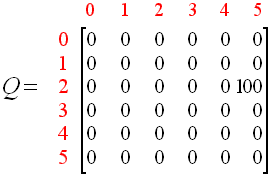

For the next episode, we start with a randomly chosen initial state.  This time, we have state 3 as our initial state.

Look at the fourth row of matrix R; it has 3 possible actions: go to state 1, 2 or 4.  By random selection, we select to go to state 1 as our action.

Now we imagine that we are in state 1.  Look at the second row of reward matrix R (i.e. state 1).  It has 2 possible actions: go to state 3 or state 5.  Then, we compute the Q value:

Q(state, action) = R(state, action) + Gamma \* Max[Q(next state, all actions)]

Q(1, 5) = R(1, 5) + 0.8 \* Max[Q(1, 2), Q(1, 5)] = 0 + 0.8 \* Max(0, 100) = 80

We use the updated matrix Q from the last episode.  Q(1, 3) = 0 and Q(1, 5) = 100.  The result of the computation is Q(3, 1) = 80 because the reward is zero.  The matrix Q becomes:
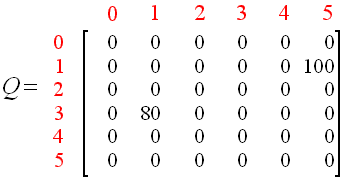

The next state, 1, now becomes the current state.  We repeat the inner loop of the Q learning algorithm because state 1 is not the goal state.

 Q(state, action) = R(state, action) + Gamma \* Max[Q(next state, all actions)]

Algorithm to utilize the Q matrix:

1. Set current state = initial state.

2. From current state, find the action with the highest Q value.

3. Set current state = next state.

4. Repeat Steps 2 and 3 until current state = goal state.

The algorithm above will return the sequence of states from the initial state to the goal state.



# 多次运行下面的cell可以看每次迭代所得到的Q表更新效果
采取的更新方案为$\epsilon$-greedy,可以通过调整$\epsilon$实现或上面的greedy，或随机采样。

For epoch in max_epoches:

1. 随机选取一个state
2. 在选取的state下选定一个可行的动作（在本例中，不可行的动作回报为"-1")
3. 按照公式`Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]`计算Q值
4. 采取2中选定的动作，将state更新到下一个state
5. 如果运动到终点则中断

End For

# 选取下个动作的方法：greedy、random、$\epsilon$-greedy

In [104]:
def randomly_select_act(state):
    # 随机选定一个正回报的动作
    flag = True
    while flag:
        action = np.random.randint(0, 6)
        if r[state, action] >= 0:
            flag = False
    return action

def greedly_select_act(state):
    # 贪心选取下个动作
    actions = list(q[state, :])
    max_q = max(actions)
    max_actioin_index = list()
    for i, act in enumerate(actions):
        if act >= max_q:
            max_actioin_index.append(i)
    return random.sample(max_actioin_index, 1)[0]

def e_greedy(state, e):
    if random.random() < e:
        return greedly_select_act(state)
    else:
        return randomly_select_act(state)

# 一个episode：
以\epsilon概率采取贪心算法
+ \epsilon = 1: 贪心
+ \epsilon = 0: 随机

In [105]:
epsilon = 1
print('e', epsilon)

print("本次epoch运动路径：")
state = np.random.randint(0,6)

for i in range(200):
    print(state, end=', ')
    if state == 5:
        break
    action = e_greedy(state, epsilon)
    action = randomly_select_act(state)
    
    q[state, action] = r[state, action] + gamma * max(q[action, :])
    state = action


print(state)
print(q)
    

e 1
本次epoch运动路径：
3, 2, 3, 1, 3, 1, 5, 5
[[   0.            0.            0.            0.          221.04408883
     0.        ]
 [   0.            0.            0.          177.17457348    0.
   276.83527107]
 [   0.            0.            0.          177.17457348    0.            0.        ]
 [   0.          221.04408883  141.46821685    0.          221.46821685
     0.        ]
 [ 176.83527107    0.            0.          176.83527107    0.
   276.83527107]
 [   0.          220.3813888     0.            0.          221.04408883
   215.2       ]]


# 使用训练得到的Q表解题：

In [111]:
state = input('请输入整数初始状态（0-5）：')
assert int(state) >= 0 and int(state) <= 5, '请输入整数初始状态（0-5）'
state = int(state)
print('行走路径为：')
for i in range(200):
    print(state, end=', ')
    if state == 5:
        break
    action = greedly_select_act(state)
    state = action

请输入整数初始状态（0-5）：0
行走路径为：
0, 4, 5, 

# 地图：
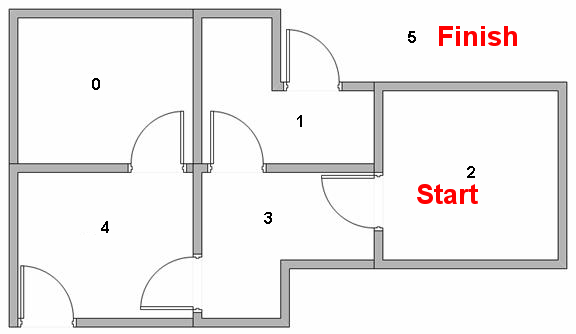